Mounted at /content/drive
dict_keys(['loss', 'kullback_leibler_divergence', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_kullback_leibler_divergence', 'val_mean_squared_error', 'val_mean_absolute_error', 'lr'])


Text(0.5, 1.0, 'Validation mean absolute error')

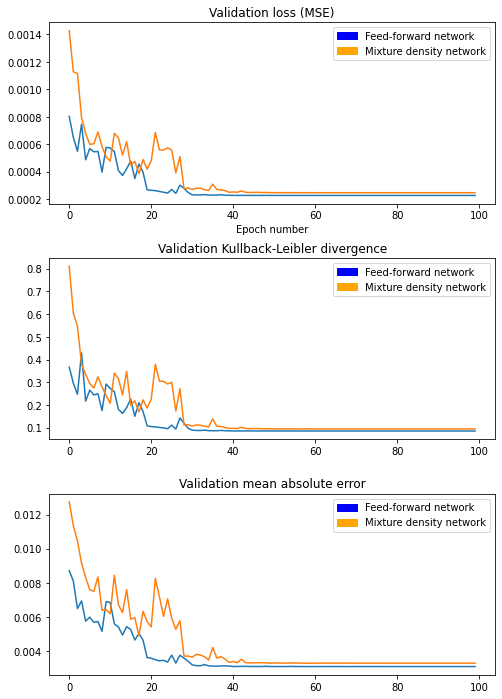

In [ ]:
'''
Code written entirely by Meal Swipes for Late Days (Tej Stead, Shreyas Rao, Jake DiChiacchio)
Uses matplotlib to produce figures for use in the final writeup and the poster.
Pickled data is produced from the other neural network code files.
'''

import pickle
from google.colab import drive 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.rcParams['figure.figsize'] = [8, 12]
drive.mount('/content/drive', force_remount=True)
locstr = '/content/drive/Shared drives/DeepWIFF/'

#Loading the data in to be used in different graphs
dense_loss_hist = pickle.load(open(locstr +  "Data/" + "FeedForward-100x100x100x100x100-MSE.p", "rb" ))
mdn_loss_hist = pickle.load(open(locstr +  "Data/" + "MDN-100x100x100x100x12-MSE.p", "rb" ))
blue_patch = mpatches.Patch(color='blue', label='Feed-forward network')
orange_patch = mpatches.Patch(color='orange', label='Mixture density network')
print(mdn_loss_hist.keys())
fig, axs = plt.subplots(3)
fig.subplots_adjust(hspace=0.3)

# axs[0].plot(dense_loss_hist['loss'])
# axs[0].plot(mdn_loss_hist['loss'])
# axs[0].set_title('Training loss (MSE)')
for i in range(3):
  axs[i].legend(handles=[blue_patch, orange_patch],loc='upper right')
axs[0].set(xlabel='Epoch number')

#Plotting the graph comparing the FFNN and MDN's MSE validation loss
axs[0].plot(dense_loss_hist['val_loss'])
axs[0].plot(mdn_loss_hist['val_loss'])
axs[0].set_title('Validation loss (MSE)')

# axs[2].plot(dense_loss_hist['kullback_leibler_divergence'])
# axs[2].plot(mdn_loss_hist['kullback_leibler_divergence'])
# axs[2].set_title('Training Kullback-Leibler divergence')

axs[1].plot(dense_loss_hist['val_kullback_leibler_divergence'])
axs[1].plot(mdn_loss_hist['val_kullback_leibler_divergence'])
axs[1].set_title('Validation Kullback-Leibler divergence')

# axs[4].plot(dense_loss_hist['mean_absolute_error'])
# axs[4].plot(mdn_loss_hist['mean_absolute_error'])
# axs[4].set_title('Training mean absolute error')

axs[2].plot(dense_loss_hist['val_mean_absolute_error'])
axs[2].plot(mdn_loss_hist['val_mean_absolute_error'])
axs[2].set_title('Validation mean absolute error')



Thinking quickly, the deep learners constructed a neural network using only their minds, Google's massive GPU farm, and a neural network.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from scipy.io import loadmat,savemat
'''
Loads training and testing data from pickle file.
'''
locstr = '/content/drive/Shared drives/DeepWIFF/'


X_train = pickle.load( open(locstr +  "Data/" + "X_train.p", "rb" ) )
X_test = pickle.load( open( locstr + "Data/" + "X_test.p", "rb" ) )
y_train = pickle.load( open(locstr + "Data/" + "y_train.p","rb"))
y_test = pickle.load( open(locstr + "Data/" + "y_test.p","rb"))

feed_forward_network = load_model(locstr + "Network Weights/" + "Full-100x100x100x100x100-mse-FINAL_2.h5")

# q = random.randint(0,y_test.shape[0])
# plt.semilogx(Rcent,y_test[q,:])

# test_out = NN_fullnet.predict(np.expand_dims(X_test[q,:],axis=1).T).T

# plt.semilogx(Rcent,test_out)

# print('MAE value here is ' + str(sum(abs(np.subtract(np.expand_dims(y_test[q,:],axis=1),test_out)))))
misc_data = loadmat(locstr + 'Data/NN_params.mat')

Freq = misc_data['f']
dFreq = Freq * (np.sqrt(1.1) - np.sqrt(1/1.1)); 
Redge = misc_data['redge'].T
Rcent = misc_data['rcent'].T
Lambda = misc_data['lambda']
test_out = feed_forward_network.predict(X_test)

errmat = np.sum(np.abs((test_out - y_test)),axis=1)
errmat2 = np.mean((test_out - y_test)**2,axis=1)
testE = np.sum(X_test[:,:25]*dFreq.T,axis=1)
testH = X_test[:,-1]

print(errmat.shape)
print(testE.shape)
print(testH.shape)

#FFNN NETWORK STATS
print('SAE is: ' + str(np.nanmean(errmat)))
print("<5% SAE is: " + str(np.sum(errmat < 0.05)/len(X_test)))
print("<10% SAE is: " + str(np.sum(errmat < 0.1)/len(X_test)))
print("<25% SAE is: " + str(np.sum(errmat < 0.25)/len(X_test)))
print('MSE is: ' + str(np.nanmean(errmat2)))


''' MDN NETWORK STATS
SAE is: 0.16232875444933612
>10% SAE is: 0.3497292976572092
SAE is: 0.16232875444933612
<5% SAE is: 0.32717488937050376
<10% SAE is: 0.6502707023427907
<25% SAE is: 0.844583068948752
MSE is: 0.0002510143819351544
MSE is: 0.0002510143819351544
'''

(121351,)
(121351,)
(121351,)
SAE is: 0.14560296904388456
<5% SAE is: 0.40857512505047344
<10% SAE is: 0.7102784484676682
<25% SAE is: 0.8667913737834876
MSE is: 0.00023436574143770157
